Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, complete the steps outlined in this notebook by writing code in the cells.

In [1472]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [1473]:
#### Load the automobiles dataset 
auto_df = pd.read_csv('automobile.txt')
auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the columns from the data set that are irrelevant as they will not be used in the analysis.

In [1474]:
auto_df.drop('symboling',axis=1, inplace=True)
auto_df.drop('normalized-losses',axis=1, inplace=True)
auto_df.drop('engine-location',axis=1, inplace=True)
auto_df.drop('fuel-type',axis=1, inplace=True)
auto_df.drop('aspiration',axis=1, inplace=True)
auto_df.drop('width',axis=1, inplace=True)     
auto_df.drop('fuel-system',axis=1, inplace=True)
auto_df.drop('curb-weight',axis=1, inplace=True)
auto_df.drop('drive-wheels',axis=1, inplace=True)
auto_df.drop('height',axis=1, inplace=True),
auto_df.drop('length',axis=1, inplace=True)
auto_df.drop('body-style',axis=1, inplace=True)
auto_df.columns

Index(['make', 'num-of-doors', 'wheel-base', 'engine-type', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

#### Remove any duplicate rows

In [1475]:
auto_df.drop_duplicates(keep='first',inplace=True)


#### Remove rows with missing data 

Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [1476]:
missing_values_count = auto_df.isnull().sum()
missing_values_count

make                 0
num-of-doors         0
wheel-base           0
engine-type          0
num-of-cylinders     0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [1477]:
# Remove any row containing '?'
auto_df = auto_df[~(auto_df == '?').any(axis=1)]

In [1478]:
# Create a dataframe with all the automobiles in the 'audi" make
audi_make = auto_df.loc[auto_df.make == 'audi']
audi_make

,make,num-of-doors,wheel-base,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,audi,four,99.8,ohc,four,109,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,four,99.4,ohc,five,136,3.19,3.40,8.0,115,5500,18,22,17450
5,audi,two,99.8,ohc,five,136,3.19,3.40,8.5,110,5500,19,25,15250
6,audi,four,105.8,ohc,five,136,3.19,3.40,8.5,110,5500,19,25,17710
7,audi,four,105.8,ohc,five,136,3.19,3.40,8.5,110,5500,19,25,18920
8,audi,four,105.8,ohc,five,131,3.13,3.40,8.3,140,5500,17,20,23875


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive automobiles? 

How do the most expensive and cheapest automobiles compare? Exploring the most expensive automobiles highlights if some automobiles are worth the money spent on them based on their performance.

In [1479]:
# The cheapest autombile.
auto_df.price.min()

'10198'

In [1480]:
# The most expensive automobile.ipynb
auto_df.price.max()

'9995'

#### What are the top 5 most expensive automobiles? 

Compare the min and max prices of autombiles. The comparison helps us identify the more expenisve and cheaper car makes. 

In [1481]:
auto_df.price = auto_df.price.astype(int)
make_group = auto_df.groupby('make')
car_data_avg = round(make_group.mean(numeric_only=True), 0)
car_data_avg.sort_values('price', ascending=False, inplace=True)
car_data_avg.price.head()
# The top 5 most expensive automobiles are jaguar, mercedes-benz, porsche, volvo and bmw.

C:\Users\T0157034\AppData\Local\Temp\ipykernel_6108\2062695545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df.price = auto_df.price.astype(int)


make
jaguar           34600.0
mercedes-benz    33647.0
porsche          31400.0
bmw              26119.0
volvo            18063.0
Name: price, dtype: float64

#### Find the most powerful automobiles. 
Sort the dataframe based on the horsepower column.

In [1482]:
auto_df.horsepower = auto_df.horsepower.astype(int)
auto_df.sort_values('horsepower', ascending=False)



C:\Users\T0157034\AppData\Local\Temp\ipykernel_6108\243115022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df.horsepower = auto_df.horsepower.astype(int)


,make,num-of-doors,wheel-base,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,jaguar,two,102.0,ohcv,twelve,326,3.54,2.76,11.5,262,5000,13,17,36000
126,porsche,two,89.5,ohcf,six,194,3.74,2.90,9.5,207,5900,17,25,32528
127,porsche,two,89.5,ohcf,six,194,3.74,2.90,9.5,207,5900,17,25,34028
128,porsche,two,89.5,ohcf,six,194,3.74,2.90,9.5,207,5900,17,25,37028
105,nissan,two,91.3,ohcv,six,181,3.43,3.27,7.8,200,5200,17,23,19699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,toyota,four,95.7,ohc,four,110,3.27,3.35,22.5,56,4500,34,36,7898
90,nissan,two,94.5,ohc,four,103,2.99,3.47,21.9,55,4800,45,50,7099
184,volkswagen,four,97.3,ohc,four,97,3.01,3.40,23.0,52,4800,37,46,7995
182,volkswagen,two,97.3,ohc,four,97,3.01,3.40,23.0,52,4800,37,46,7775


#### Find automobiles which have a peak rpm higher than 5500

In [1483]:
auto_df['peak-rpm'] = auto_df['peak-rpm'].astype(int)
auto_df[auto_df['peak-rpm'] > 5500]


C:\Users\T0157034\AppData\Local\Temp\ipykernel_6108\3611651415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df['peak-rpm'] = auto_df['peak-rpm'].astype(int)


,make,num-of-doors,wheel-base,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
10,bmw,two,101.2,ohc,four,108,3.50,2.80,8.8,101,5800,23,29,16430
11,bmw,four,101.2,ohc,four,108,3.50,2.80,8.8,101,5800,23,29,16925
31,honda,two,86.6,ohc,four,92,2.91,3.41,9.2,76,6000,31,38,6855
33,honda,two,93.7,ohc,four,92,2.91,3.41,9.2,76,6000,30,34,6529
34,honda,two,93.7,ohc,four,92,2.91,3.41,9.2,76,6000,30,34,7129
35,honda,four,96.5,ohc,four,92,2.91,3.41,9.2,76,6000,30,34,7295
36,honda,four,96.5,ohc,four,92,2.92,3.41,9.2,76,6000,30,34,7295
37,honda,two,96.5,ohc,four,110,3.15,3.58,9.0,86,5800,27,33,7895
38,honda,two,96.5,ohc,four,110,3.15,3.58,9.0,86,5800,27,33,9095
39,honda,four,96.5,ohc,four,110,3.15,3.58,9.0,86,5800,27,33,8845


#### Most successful makes
Create a bar plot explaining the frequency of automobiles in each make.

In [1484]:
temp_make = auto_df['make'].str.split(',')
temp_make

0      [alfa-romero]
1      [alfa-romero]
2      [alfa-romero]
3             [audi]
4             [audi]
           ...      
200          [volvo]
201          [volvo]
202          [volvo]
203          [volvo]
204          [volvo]
Name: make, Length: 192, dtype: object

Text(0, 0.5, 'Car Makes')

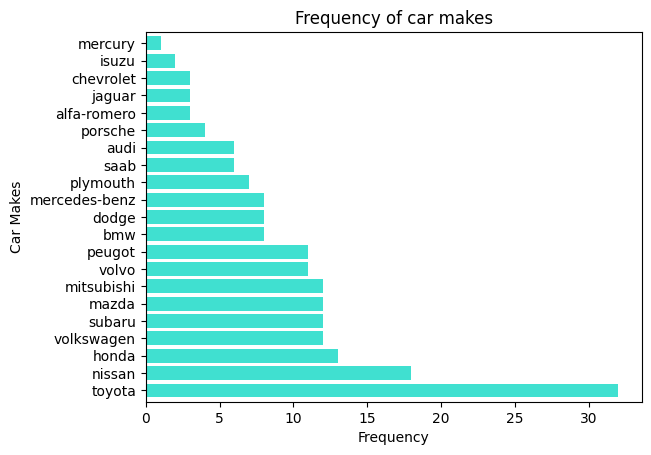

In [1491]:

make_list = []
for i in temp_make:
    make_list.extend(i)
make_count = pd.Series(make_list).value_counts()
make_count.plot.barh(width = 0.8, color = 'turquoise')
plt.title('Frequency of car makes')
plt.xlabel('Frequency')
plt.ylabel('Car Makes')

Text(0, 0.5, 'Engine-size')

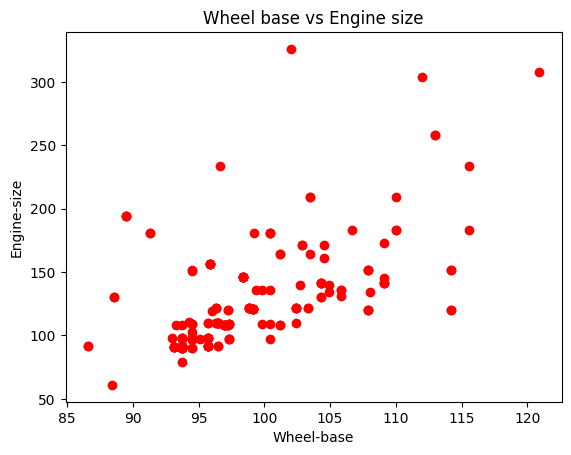

In [1487]:
# Relationship between engine-size and wheel-base.
x = auto_df['wheel-base']
y = auto_df['engine-size']
plt.scatter(x,y, color='red')
plt.title('Wheel base vs Engine size')
plt.xlabel('Wheel-base')
plt.ylabel('Engine-size')
# There is a positive correlation between the wheel base and engine-size.

Text(0, 0.5, 'Count')

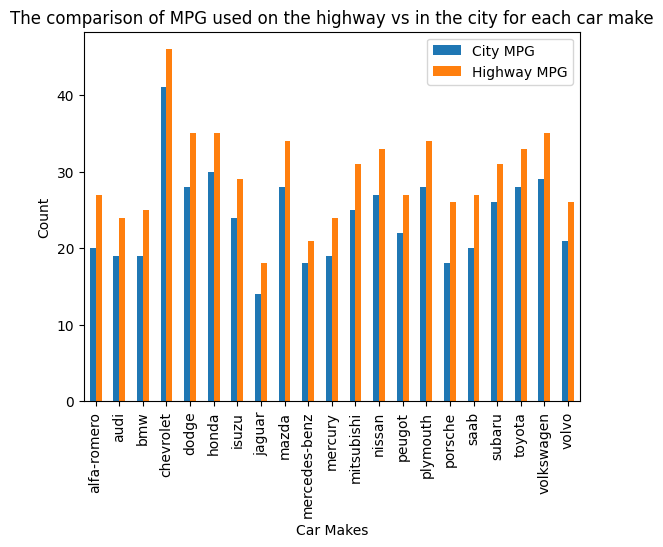

In [1494]:
# Group by make.
group_by_type = auto_df.groupby(by=['make'])

# Get the mean (average) for each type across all columns
# Note the mean can only be calculated for numeric values
auto_avg = round(group_by_type.mean(numeric_only=True), 0) 

features_to_plot = pd.DataFrame({'City MPG': auto_avg['city-mpg'],
                                'Highway MPG': auto_avg['highway-mpg']})
features_to_plot.plot(kind='bar')
plt.title("The comparison of MPG used on the highway vs in the city for each car make")
plt.xlabel('Car Makes')
plt.ylabel('Count')
# Comparison made between MPG on highway vs in city.

Text(0, 0.5, 'Horsepower')

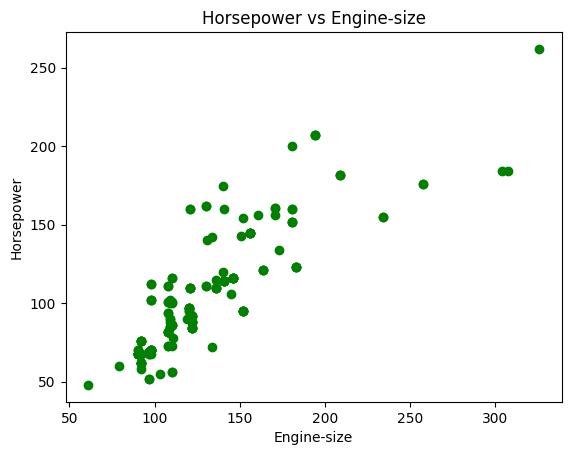

In [1492]:
# Relationship between horsepower and engine-size
y = auto_df['horsepower']
x = auto_df['engine-size']
plt.scatter(x,y, color = 'green')
plt.title('Horsepower vs Engine-size')
plt.xlabel('Engine-size')
plt.ylabel('Horsepower')
# Positive correlation between engine-size and horsepower.